In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (12,8)

# pd.options.mode.chained_assignment = None




In [2]:


# Now we need to read in the data
df = pd.read_csv(r'D:\GIT_PROJECTs\Data Analysis portfolio Python\movies.csv')

In [3]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [80]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%
released_dataformat - 1%


In [100]:
listnullnumber=[]
for i in df.columns :
    listnullnumber.append(round(100*df[i].isnull().mean()))
listnullnumber

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 2, 0, 0]

In [79]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%
released_dataformat - 1%


In [21]:
# Data Types for our columns

print(df.dtypes)

name                           object
rating                         object
genre                          object
year                            int64
released                       object
score                         float64
votes                         float64
director                       object
writer                         object
star                           object
country                        object
budget                        float64
gross                         float64
company                        object
runtime                       float64
released_dataformat    datetime64[ns]
dtype: object


In [3]:
#creating new date format column from release column and calculating the missing date rows 
df['released_dataformat'] = df['released'].str.extract(r'(.+)\s\(')[0]
df['released_dataformat'] = pd.to_datetime(df['released_dataformat'], format='%B %d, %Y', errors='coerce')
print(df['released_dataformat'].dtypes)  # Should show datetime64[ns]
print(df['released_dataformat'].isna().sum())  # Count NaT values



datetime64[ns]
59


<Axes: >

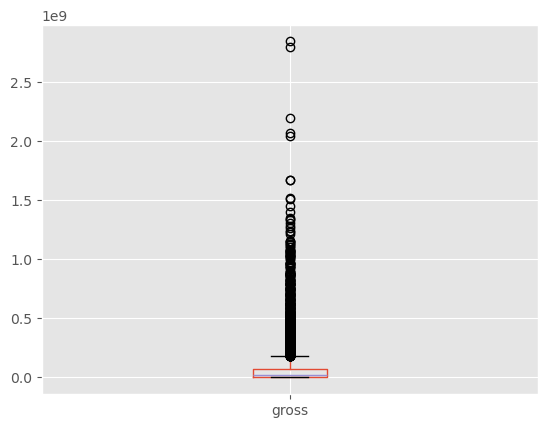

In [81]:
# Are there any Outliers?

df.boxplot(column=['gross'])
# plt.show()

In [ ]:
#calculating outliers and gather them in new dataframe
column_name = 'gross'
Q1 = df[column_name].quantile(0.25)

Q2 = df[column_name].quantile(0.5)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print('Q1: ', Q1,'Q2: ',Q2, 'Q3: ', Q3)

Q1:  4532055.5 Q2:  20205757.0 Q3:  76016691.5


In [ ]:
#drop duplicates, keep original untouched and make new df with no duplicates
nodup_df = df.drop_duplicates()
nodup_df
#create duplicates rows into new df
duplicates = df[df.duplicated(keep=False)]
duplicates #no duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dataformat


In [ ]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)
#sort based on preassugned index when importing by pandas
df.sort_index()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dataformat
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020-10-23
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020-02-07
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020-04-27
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020-10-01


Text(0, 0.5, 'Y-axis label')

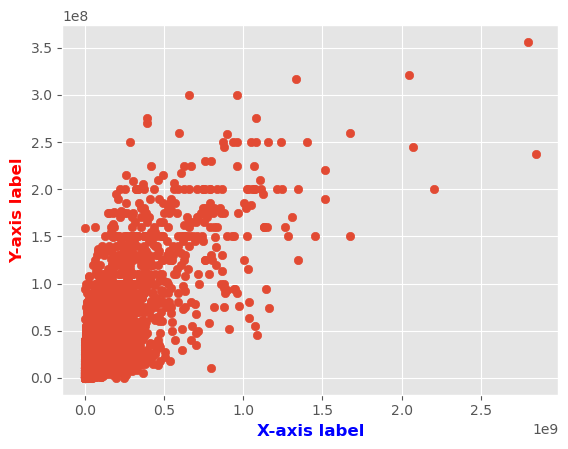

In [ ]:
plt.scatter(x="gross", y="budget", data=df)

plt.xlabel('X-axis label', fontsize=12, color='blue', fontweight='bold')
plt.ylabel('Y-axis label', fontsize=12, color='red', fontweight='bold')



<Axes: xlabel='gross', ylabel='budget'>

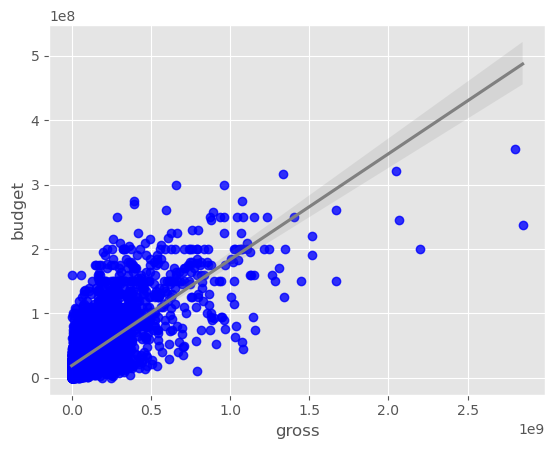

In [17]:
# sns.regplot(x="score", y="gross", data=df)
sns.regplot(x="gross", y="budget", data=df, scatter_kws={'color': "blue"}, line_kws={'color': "grey"})



In [ ]:
# Correlation Matrix between all numeric columns
# df.corr()
df.corr(numeric_only=True)
# df.corr(method ='pearson')    df.corr(method ='kendall')     df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


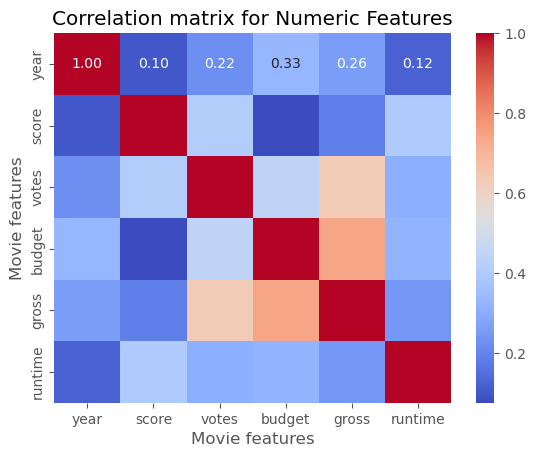

In [30]:
correlation_matrix = df.corr(numeric_only=True)

# sns.heatmap(correlation_matrix, annot = True)
# sns.heatmap(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [171]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.070302,-0.189282,0.480919,0.300018,0.978268,0.965431,-0.062005,0.370211,0.134315,0.009605,0.257396,0.955916,0.674068,-0.102399,0.020254,NaN,-0.099138
company,0.070302,1.000000,0.061540,0.155935,0.060236,0.101625,0.101876,0.000846,0.166275,-0.027840,0.031371,0.165490,0.089678,0.133796,0.105162,-0.008602,NaN,0.074285
country,-0.189282,0.061540,1.000000,-0.133631,-0.013013,-0.187801,-0.187762,0.124684,-0.051932,0.021056,0.012047,-0.054245,-0.181534,-0.146713,-0.004329,0.009149,NaN,-0.012557
director,0.480919,0.155935,-0.133631,1.000000,0.216499,0.507853,0.504802,-0.028938,0.292789,0.044193,0.036790,0.296325,0.497085,0.491595,0.030836,-0.009890,NaN,0.015255
genre,0.300018,0.060236,-0.013013,0.216499,1.000000,0.292627,0.288330,-0.024621,0.097809,0.031636,0.041309,0.098848,0.295037,0.230763,-0.003674,-0.017057,NaN,-0.003128
gross,0.978268,0.101625,-0.187801,0.507853,0.292627,1.000000,0.984267,-0.064561,0.422125,0.135257,0.013615,0.295385,0.974594,0.700464,-0.022809,0.019572,NaN,-0.026757
name,0.965431,0.101876,-0.187762,0.504802,0.288330,0.984267,1.000000,-0.065076,0.417623,0.130176,0.012255,0.292396,0.960618,0.695995,-0.023150,0.017110,NaN,-0.027272
rating,-0.062005,0.000846,0.124684,-0.028938,-0.024621,-0.064561,-0.065076,1.000000,-0.037900,0.035531,0.041838,0.000761,-0.060888,-0.056504,-0.013564,-0.010236,NaN,-0.020357
released,0.370211,0.166275,-0.051932,0.292789,0.097809,0.422125,0.417623,-0.037900,1.000000,0.070848,0.026386,0.211113,0.412720,0.315467,0.236153,-0.001076,NaN,0.225125
runtime,0.134315,-0.027840,0.021056,0.044193,0.031636,0.135257,0.130176,0.035531,0.070848,1.000000,0.054928,0.002983,0.137631,0.061594,0.011952,-0.005537,NaN,0.009247


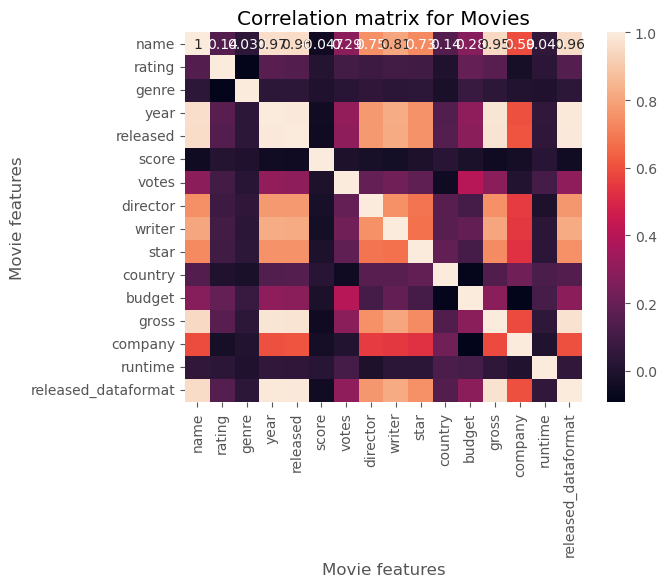

In [36]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [73]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget  budget      1.000000
        company     0.070302
        country    -0.189282
        director    0.480919
        genre       0.300018
                      ...   
year    score       0.010438
        star        0.055951
        votes      -0.025407
        writer      0.003199
        year        1.000000
Length: 225, dtype: float64


In [ ]:
df_cat = df

for col in df_cat.columns:
    if df_cat[col].dtype == 'object':
        df_cat[col] = df_cat[col].astype('category')
        df_cat[col] = df_cat[col].cat.codes
        

In [58]:
df_cat.dtypes
df_cat

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dataformat
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020-10-23
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020-02-07
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020-04-27
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020-10-01


Text(50.58159722222221, 0.5, 'Movie features')

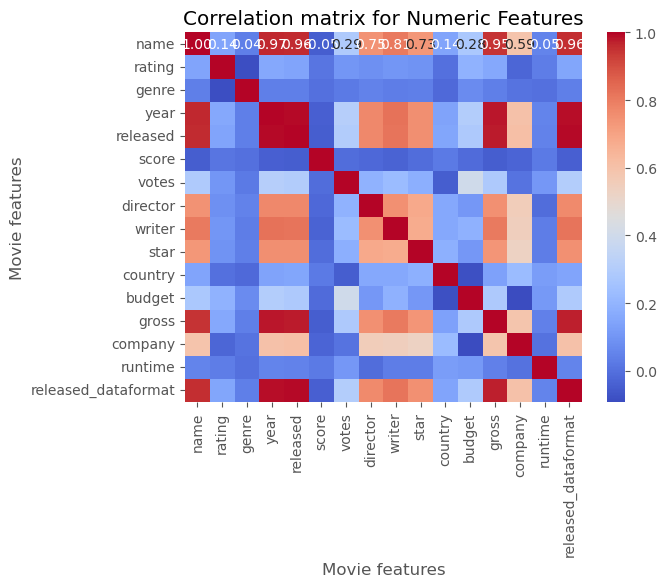

In [50]:
# df_cat.dtypes
orrelation_matrix = df_cat.corr(numeric_only=True)

# sns.heatmap(correlation_matrix, annot = True)
# sns.heatmap(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")


In [74]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country   budget     -0.189282
budget    country    -0.189282
country   gross      -0.187801
gross     country    -0.187801
country   name       -0.187762
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [75]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  name        0.504802
name      director    0.504802
gross     director    0.507853
director  gross       0.507853
budget    writer      0.674068
writer    budget      0.674068
          votes       0.677493
votes     writer      0.677493
name      writer      0.695995
writer    name        0.695995
gross     writer      0.700464
writer    gross       0.700464
budget    votes       0.955916
votes     budget      0.955916
name      votes       0.960618
votes     name        0.960618
budget    name        0.965431
name      budget      0.965431
votes     gross       0.974594
gross     votes       0.974594
budget    gross       0.978268
gross     budget      0.978268
          name        0.984267
name      gross       0.984267
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross   

In [130]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [139]:
df['Year'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,NaN,NaN,2017
1871,0.0,Paramount Pictures,USA,Richard Benjamin,Comedy,18137661.0,Milk Money,PG-13,1994-08-31,110,5.5,Melanie Griffith,9880,John Mattson,1994,NaN,NaN,1994
1852,0.0,Twentieth Century Fox Film Corporation,USA,Les Mayfield,Family,17193886.0,Miracle on 34th Street,PG,1994-11-18,114,6.4,Richard Attenborough,24126,Valentine Davies,1994,NaN,NaN,1994
1854,0.0,Morgan Creek Productions,USA,Dennis Hopper,Comedy,1596700.0,Chasers,R,1994-04-22,102,5.0,Tom Berenger,4804,Joe Batteer,1994,NaN,NaN,1994
1855,0.0,Renn Productions,France,Patrice Ch�reau,Biography,2017346.0,Queen Margot,R,1994-12-09,159,7.5,Isabelle Adjani,14377,Alexandre Dumas,1994,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,Marvel Studios,USA,Joss Whedon,Action,459005868.0,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015,NaN,NaN,2015
6194,250000000.0,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788.0,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014,NaN,NaN,2014
4637,258000000.0,Columbia Pictures,USA,Sam Raimi,Action,336530303.0,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007,NaN,NaN,2007
5293,260000000.0,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936.0,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010,NaN,NaN,2010


In [140]:


df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,26183197.0
1+2 Seisaku Iinkai,2000,1136776.0
101st Street Films,1998,306715.0
10th Hole Productions,2010,103280.0
120 Films,2002,753501.0
...,...,...
Zucker Brothers Productions,1998,6940185.0
double A Films,2000,1568749.0
erbp,2013,444098.0


In [153]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                                 year
Paramount Pictures                      2011    1486604229
Universal Pictures                      2015    1411831667
Warner Bros.                            2008    1327598616
                                        2010    1255477478
                                        2011    1217527619
                                        2005    1175793638
Twentieth Century Fox Film Corporation  2009    1173191407
Warner Bros.                            2006    1154792759
                                        2009    1146640373
Walt Disney Pictures                    2010    1134883375
Columbia Pictures                       2011    1072753462
Universal Pictures                      2013    1066421491
Warner Bros.                            2014    1062468828
Universal Pictures                      2007    1057955786
Columbia Pictures                       2012    1020616938
Name: gross, dtype: int64

In [179]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

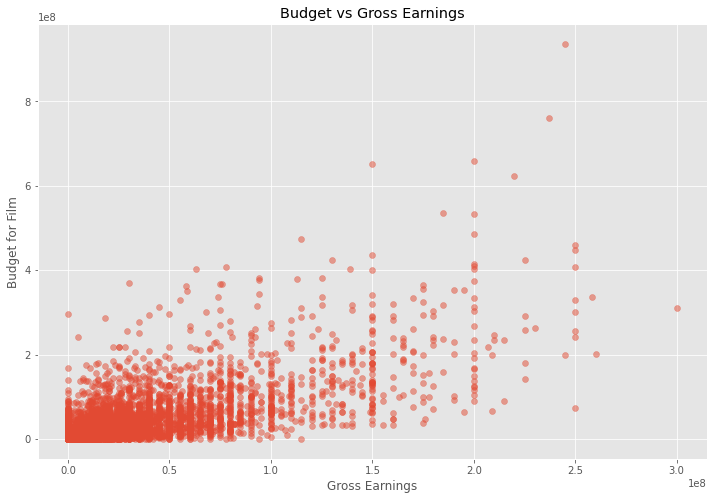

In [184]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [199]:
df


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [200]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [75]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dataformat
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980-06-13
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980-07-02
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980-06-20
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980-07-02
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,2020-10-23
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,2020-02-07
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,2020-04-27
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,2020-10-01


In [71]:
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'category':
        
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # Assign numeric codes
        print(f"Numeric codes for {col_name}: {df[col_name].unique()}")


Numeric codes for released: [1705 1492 1771 ... 2964  193  391]
Numeric codes for director: [2589 2269 1111 ... 2061 1184 2165]
Numeric codes for writer: [4014 1632 2567 ... 2683 1824 3344]
Numeric codes for star: [1047  327 1745 ... 2040  450 2463]
Numeric codes for country: [54 55 44 57  6  2 30 25 46 14 17 45 48 47 32 49 33 34 37 24 27 18  5 58
  0 50 23 11 15 22  8  4  3 39 56 40 42 12 16 10 35 20 26  1 51  9 41 -1
 53 21 52 43 38 28 13 19  7 36 31 29]
Numeric codes for company: [2319  731 1540 ...  884  941 1787]


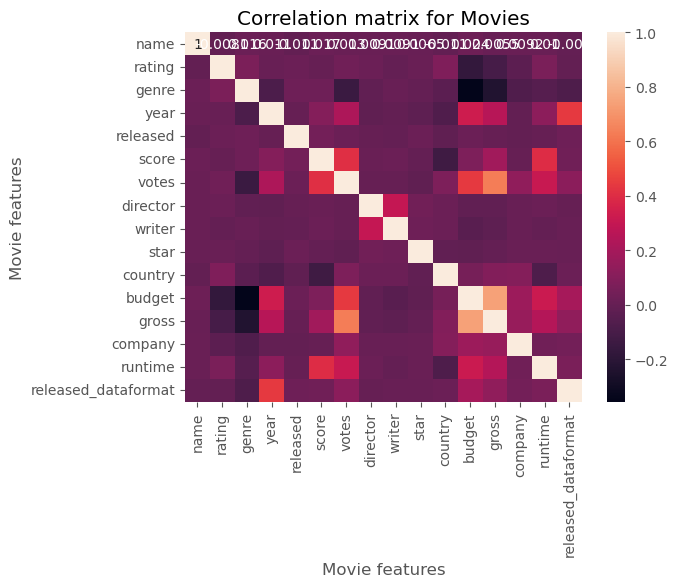

In [76]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]=    df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [194]:

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,NaN,NaN,2017
1871,0.0,Paramount Pictures,USA,Richard Benjamin,Comedy,18137661.0,Milk Money,PG-13,1994-08-31,110,5.5,Melanie Griffith,9880,John Mattson,1994,NaN,NaN,1994
1852,0.0,Twentieth Century Fox Film Corporation,USA,Les Mayfield,Family,17193886.0,Miracle on 34th Street,PG,1994-11-18,114,6.4,Richard Attenborough,24126,Valentine Davies,1994,NaN,NaN,1994
1854,0.0,Morgan Creek Productions,USA,Dennis Hopper,Comedy,1596700.0,Chasers,R,1994-04-22,102,5.0,Tom Berenger,4804,Joe Batteer,1994,NaN,NaN,1994
1855,0.0,Renn Productions,France,Patrice Ch�reau,Biography,2017346.0,Queen Margot,R,1994-12-09,159,7.5,Isabelle Adjani,14377,Alexandre Dumas,1994,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,Marvel Studios,USA,Joss Whedon,Action,459005868.0,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015,NaN,NaN,2015
6194,250000000.0,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788.0,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014,NaN,NaN,2014
4637,258000000.0,Columbia Pictures,USA,Sam Raimi,Action,336530303.0,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007,NaN,NaN,2007
5293,260000000.0,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936.0,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010,NaN,NaN,2010


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaco

<Axes: xlabel='rating', ylabel='gross'>

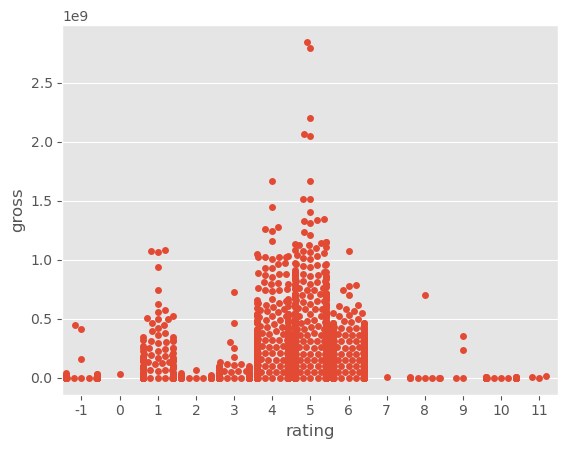

In [78]:
sns.swarmplot(x="rating", y="gross", data=df)


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='gross'>

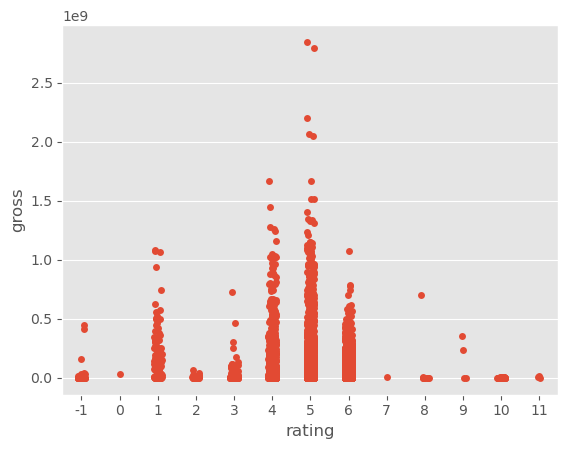

In [77]:
sns.stripplot(x="rating", y="gross", data=df)